# Verifying of Kriging

To do this, we will use our (July 16, 2021) case study from before but now randomly remove air quality stations from the kriging process in a defined verification area.


To do this we will define a buffer area as shown in the figure below.
\
![title](_static/img/study-map.png)
  - The map above was created in [area-map.py](https://github.com/cerodell/krige-smoke/blob/main/scripts/area-map.py)

\
The buffer zone is a 90 km wide zone on the outside of the verification area. The buffer zone contains air quality stations that are always included for each kriging configuration. This buffer zone was created to ensure the outermost stations were kept, which preserves an equal-sized verification area for each configuration.

\
The randomly removed air quality station from within the verification area will then be used to verify the interpolated PM 2.5 at
their location. We will use simple statics of root mean square error, mean absolute error, and
Pearson correlation to test which kriging process under differing configurations.

\

 The kriging configuration will include:

 - Ordinary kriging.

 - Universal kriging with external drift.

   - external Z drift is a unique feature where you can provide grided data in 2D, where the z-value (for example, the DEM data) is interpolated to your target points

 - Universal kriging with specified drift.

   - specified drift is the classical form of external drift kriging, where a linear correlated second variable needs to be given at all conditioning points AND at the target points for kriging (this could also be used for DEM data, but you have to provide the data at the exact points, where you want to krige the temperature)
\
For UK with external and specified drift, four different covariates are tested.
The covariates are:

 - elevation (take from a [digital elevation model](http://research.jisao.washington.edu/data_sets/elevation/)

 - aerosol optical depth (derived from the [modis aqua/terra satellites](https://www.nsstc.uah.edu/data/sundar/MODIS_AOD_L3_HRG/)

 - wind direction (as modeled by [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview>)

\
For each kriging configuration, we test three different percentages of the number of air quality stations removed. The three different percentages were 10%, 30%, and 50%. For each percentage, we also did ten iterations of random removal of air quality stations. These iterations were done to try and make the removal process fairer, but we acknowledge this method could be improved with a better means of random sampling and more iterations.

The code to create all the configurations above can be found at:
   - [OK-build.py](https://github.com/cerodell/krige-smoke/blob/main/scripts/OK-build.py)
   - [UK-aod-build.py](https://github.com/cerodell/krige-smoke/blob/main/scripts/UK-aod-build.py)
   - [UK-dem-build.py](https://github.com/cerodell/krige-smoke/blob/main/scripts/UK-dem-build.py)
   - [UK-era-build.py](https://github.com/cerodell/krige-smoke/blob/main/scripts/UK-era-build.py)

## Load python modules/package

In [1]:
import context
import pandas as pd
from pathlib import Path
from context import data_dir

from utils.utils import buildsats, plotsns

******************************
context imported. Front of path:
/Users/rodell/krige-smoke
/Users/rodell/krige-smoke/docs/source
******************************

through /Users/rodell/krige-smoke/docs/source/context.py -- pha


## Get a output of all kriging configurations

In [2]:
pathlistUK = sorted(Path(str(data_dir)).glob(f"UK-*"))
pathlistOK = sorted(Path(str(data_dir)).glob(f"OK-*"))
pathlistRK = sorted(Path(str(data_dir)).glob(f"RK-*"))

pathlist = pathlistOK + pathlistUK + pathlistRK

# print(pathlist)

## Open kriging configurations and perform stats

In [3]:
df_final = pd.concat([buildsats(path) for path in pathlist]).reset_index()

## Plot results of Mean Absolute  Error

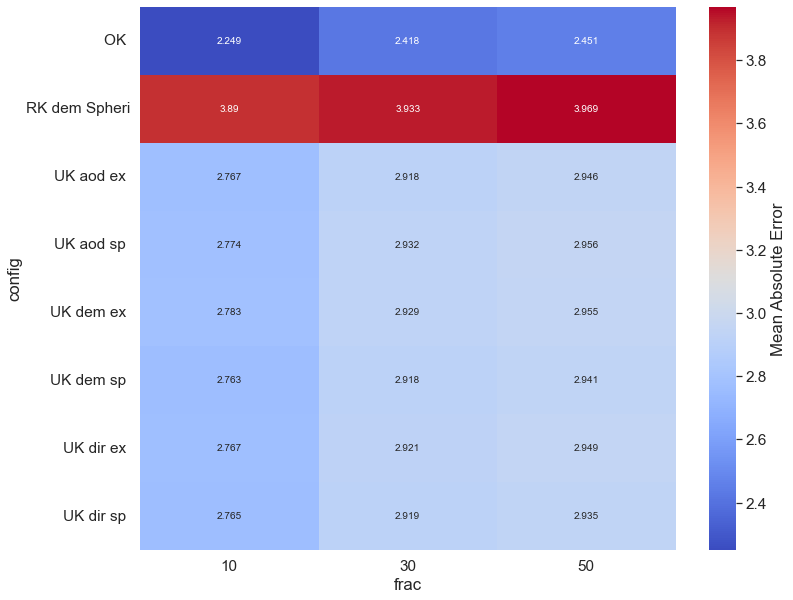

In [4]:
plotsns("mae", cmap="coolwarm", df_final=df_final)

Based on  Mean Absolute  Error, Ordinary Kriging is the most accurate for each percentage of randomly removed aq monitors.

## Plot results of Root Mean Square Error

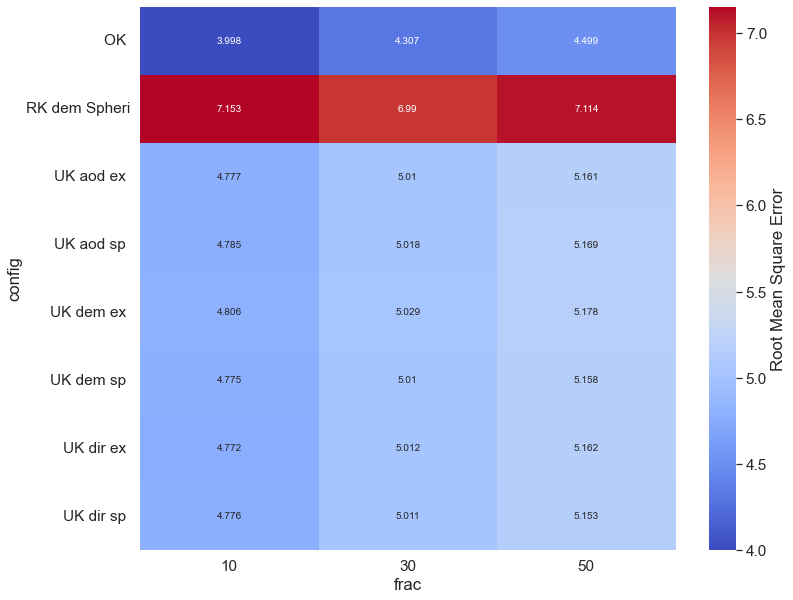

In [5]:
plotsns("rmse", cmap="coolwarm", df_final=df_final)

Based on Root Mean Square Error, Ordinary Kriging is the most accurate for each percentage of randomly removed aq monitors.

## Plot results of Pearsons Corelation

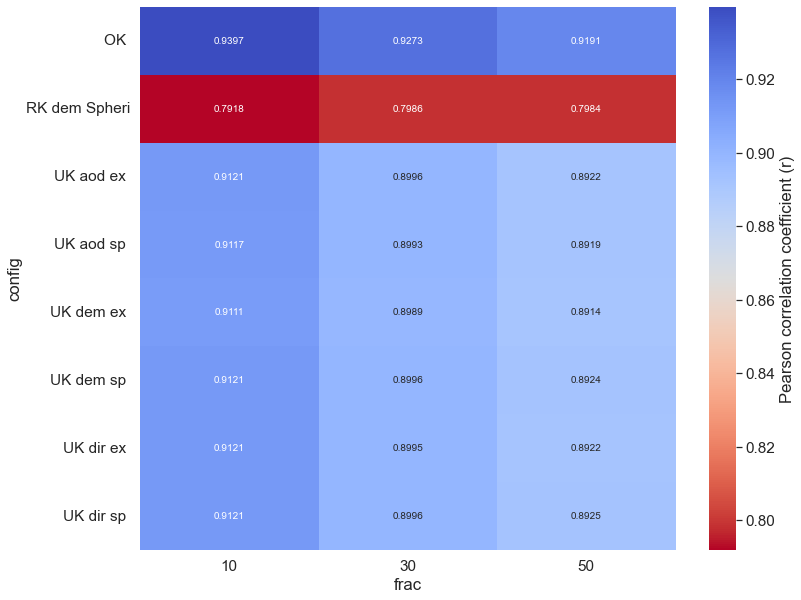

In [6]:
plotsns("pr", cmap="coolwarm_r", df_final=df_final)

Based on Pearson's Correlation, Ordinary Kriging is the most accurate for each percentage of randomly removed aq monitors.

## Conclusion
Looking at our case study's basic statistics, OK outperforms the other kriging methods. However, I feel that more time and testing RK would be a better method. The literature supports RK over OK as long as an adequate trend model is fitted. Also, RK was not projected to a lambert conformal projection like in our OK and UK configuration; this is likely contributed to the poor performance of RK. Another thought is testing different ways to transform the data before kriging. Methods like normalizing, square root, cubic root, or natural logarithm transformation could be explored.


Finally, looking at different covariates and how one could bring in a wildfire location and alter the kriged weight to be the height in those locations could be interesting. One approach could be to use the BlueSky smoke forecast as a covariate. And perhaps combine it with other covariates like DEM AOD etc.